/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


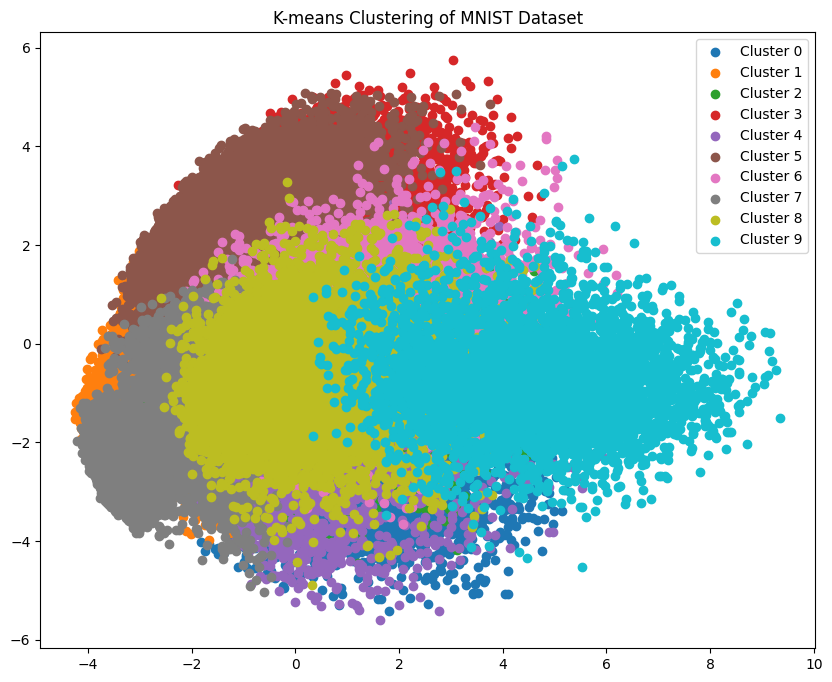

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784')
X, y = mnist['data'].astype(float), mnist['target'].astype(int)

# Normalize the pixel values to [0, 1]
X /= 255.0

# Convert DataFrame to NumPy array
X_array = X.values

# Flatten the images
X_flat = X_array.reshape(X_array.shape[0], -1)

# Apply K-means clustering
num_clusters = 10  # Adjust based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_flat)

# Visualize the results using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

# Scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('K-means Clustering of MNIST Dataset')
plt.legend()
plt.show()


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 640x480 with 0 Axes>

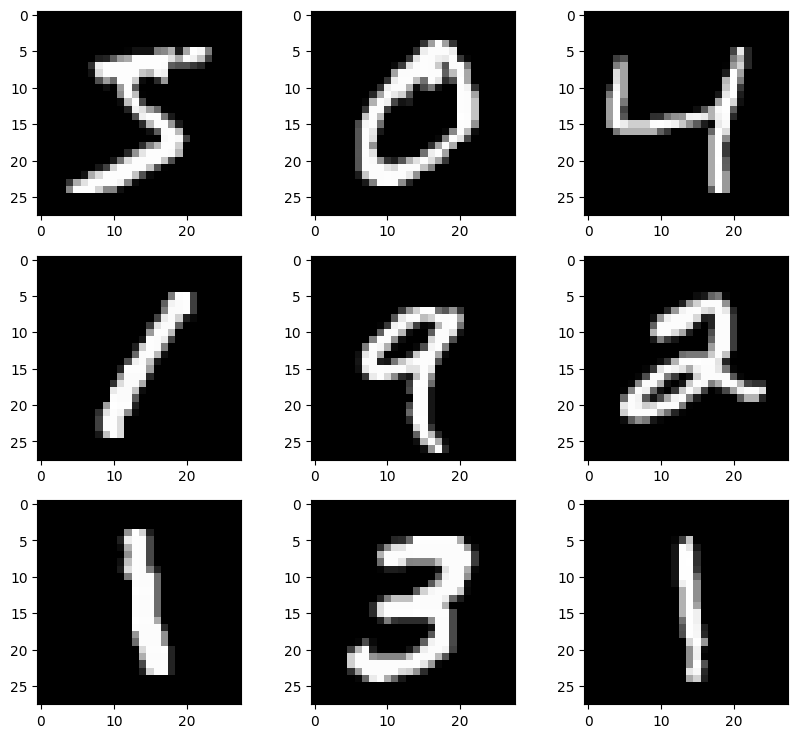

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [ ]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [ ]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [ ]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
print(x_train.min())
print(x_train.max())

0.0
1.0


In [ ]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([8, 3, 2, ..., 5, 9, 0], dtype=int32)

In [ ]:
def retrieve_info(cluster_labels, y_train, kmeans):
    '''
    Associates the most probable label with each cluster in the KMeans model
    returns: dictionary of clusters assigned to each label
    '''
    # Initializing
    reference_labels = {}

    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num

    return reference_labels


In [ ]:
# Assuming kmeans is already defined
result = retrieve_info(kmeans.labels_, y_train, kmeans)

In [ ]:
print(result)

{0: 1, 1: 3, 2: 4, 3: 0, 4: 1, 5: 8, 6: 2, 7: 7, 8: 3, 9: 6}


In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train, kmeans)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [ ]:
print(number_labels[:20].astype('int'))
print(y_train[:20])

[3 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5762


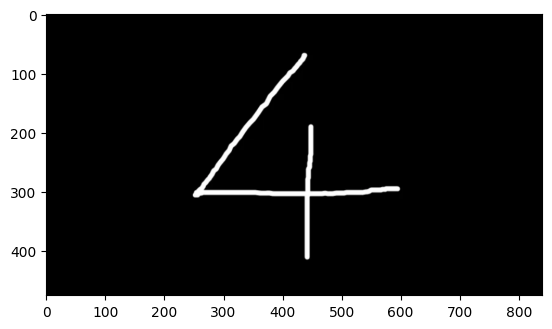

In [ ]:
image = plt.imread('number_4.png')
plt.imshow(image)

In [ ]:
image.shape

(476, 840, 4)